# EDA

In [18]:
!pip install wordcloud
!pip install nltk
import numpy as np
import pandas as pd 
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
%matplotlib inline
plt.style.use('ggplot')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
from google.colab import files
uploaded = files.upload()

Saving austin_bikeshare_stations.csv to austin_bikeshare_stations.csv
Saving austin_bikeshare_trips.csv to austin_bikeshare_trips.csv


In [20]:
import io
df_s = pd.read_csv(io.BytesIO(uploaded['austin_bikeshare_stations.csv']))
df_t = pd.read_csv(io.BytesIO(uploaded['austin_bikeshare_trips.csv']))

In [21]:
df_s.head()

latitude              location  ...  station_id  status
0  30.27041  (30.27041 -97.75046)  ...        2537  active
1  30.26452   (30.26452 -97.7712)  ...        2572  active
2  30.27595  (30.27595 -97.74739)  ...        2545  closed
3  30.28480   (30.2848 -97.72756)  ...        1004  closed
4  30.26694  (30.26694 -97.74939)  ...        1008   moved

[5 rows x 6 columns]

In [22]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   latitude    72 non-null     float64
 1   location    72 non-null     object 
 2   longitude   72 non-null     float64
 3   name        72 non-null     object 
 4   station_id  72 non-null     int64  
 5   status      72 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.5+ KB


In [23]:
df_t.head()

bikeid checkout_time  ...     trip_id    year
0     8.0      19:12:00  ...  9900082882  2015.0
1   141.0       2:06:04  ...    12617682  2016.0
2   578.0      16:28:27  ...     9075366  2016.0
3   555.0      15:12:00  ...  9900319298  2014.0
4    86.0      15:39:13  ...    14468597  2017.0

[5 rows x 12 columns]

In [24]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649231 entries, 0 to 649230
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   bikeid              648508 non-null  float64
 1   checkout_time       649231 non-null  object 
 2   duration_minutes    649231 non-null  int64  
 3   end_station_id      629389 non-null  float64
 4   end_station_name    649231 non-null  object 
 5   month               618479 non-null  float64
 6   start_station_id    630190 non-null  float64
 7   start_station_name  649231 non-null  object 
 8   start_time          649231 non-null  object 
 9   subscriber_type     647154 non-null  object 
 10  trip_id             649231 non-null  int64  
 11  year                618479 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 59.4+ MB


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

     - 34.6 MB 624 kB/s
     |████████████████████████████████| 10.1 MB 68 kB/s 
     |████████████████████████████████| 636 kB 51.8 MB/s 
     |████████████████████████████████| 102 kB 60.8 MB/s 
     |████████████████████████████████| 675 kB 40.2 MB/s 
     |████████████████████████████████| 3.1 MB 27.9 MB/s 
     |████████████████████████████████| 62 kB 829 kB/s 
     |████████████████████████████████| 76 kB 4.7 MB/s 
     |████████████████████████████████| 812 kB 19.2 MB/s 
     |████████████████████████████████| 28.5 MB 55 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=2b65892b6332d7bdaa5a80461a1fe454d4b6c835dbdc3d0514761e0a96cdf4a0
  Stored in directory: /tmp/pip-ephem-wheel-cache-pd2vgywc/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a994bf709eb223966aaa7efa5cb8a3a9aa4ca5e44e2c2eef2f375ab82042f812
  Stor

In [25]:
from pandas_profiling import ProfileReport

In [26]:
profile_s = ProfileReport(df_s)
profile_s

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
profile_t = ProfileReport(df_t)
profile_t

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Most Common Places & Busiest Time

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

## Start Station

In [29]:
start_station=df_t['start_station_name'].value_counts()

In [30]:
start_station

Riverside @ S. Lamar          28695
City Hall / Lavaca & 2nd      28535
5th & Bowie                   26669
2nd & Congress                26612
4th & Congress                24972
                              ...  
Re-branding                       7
Mobile Station @ Unplugged        4
Marketing Event                   4
Customer Service                  4
Stolen                            1
Name: start_station_name, Length: 90, dtype: int64

In [31]:
start_station.shape

(90,)

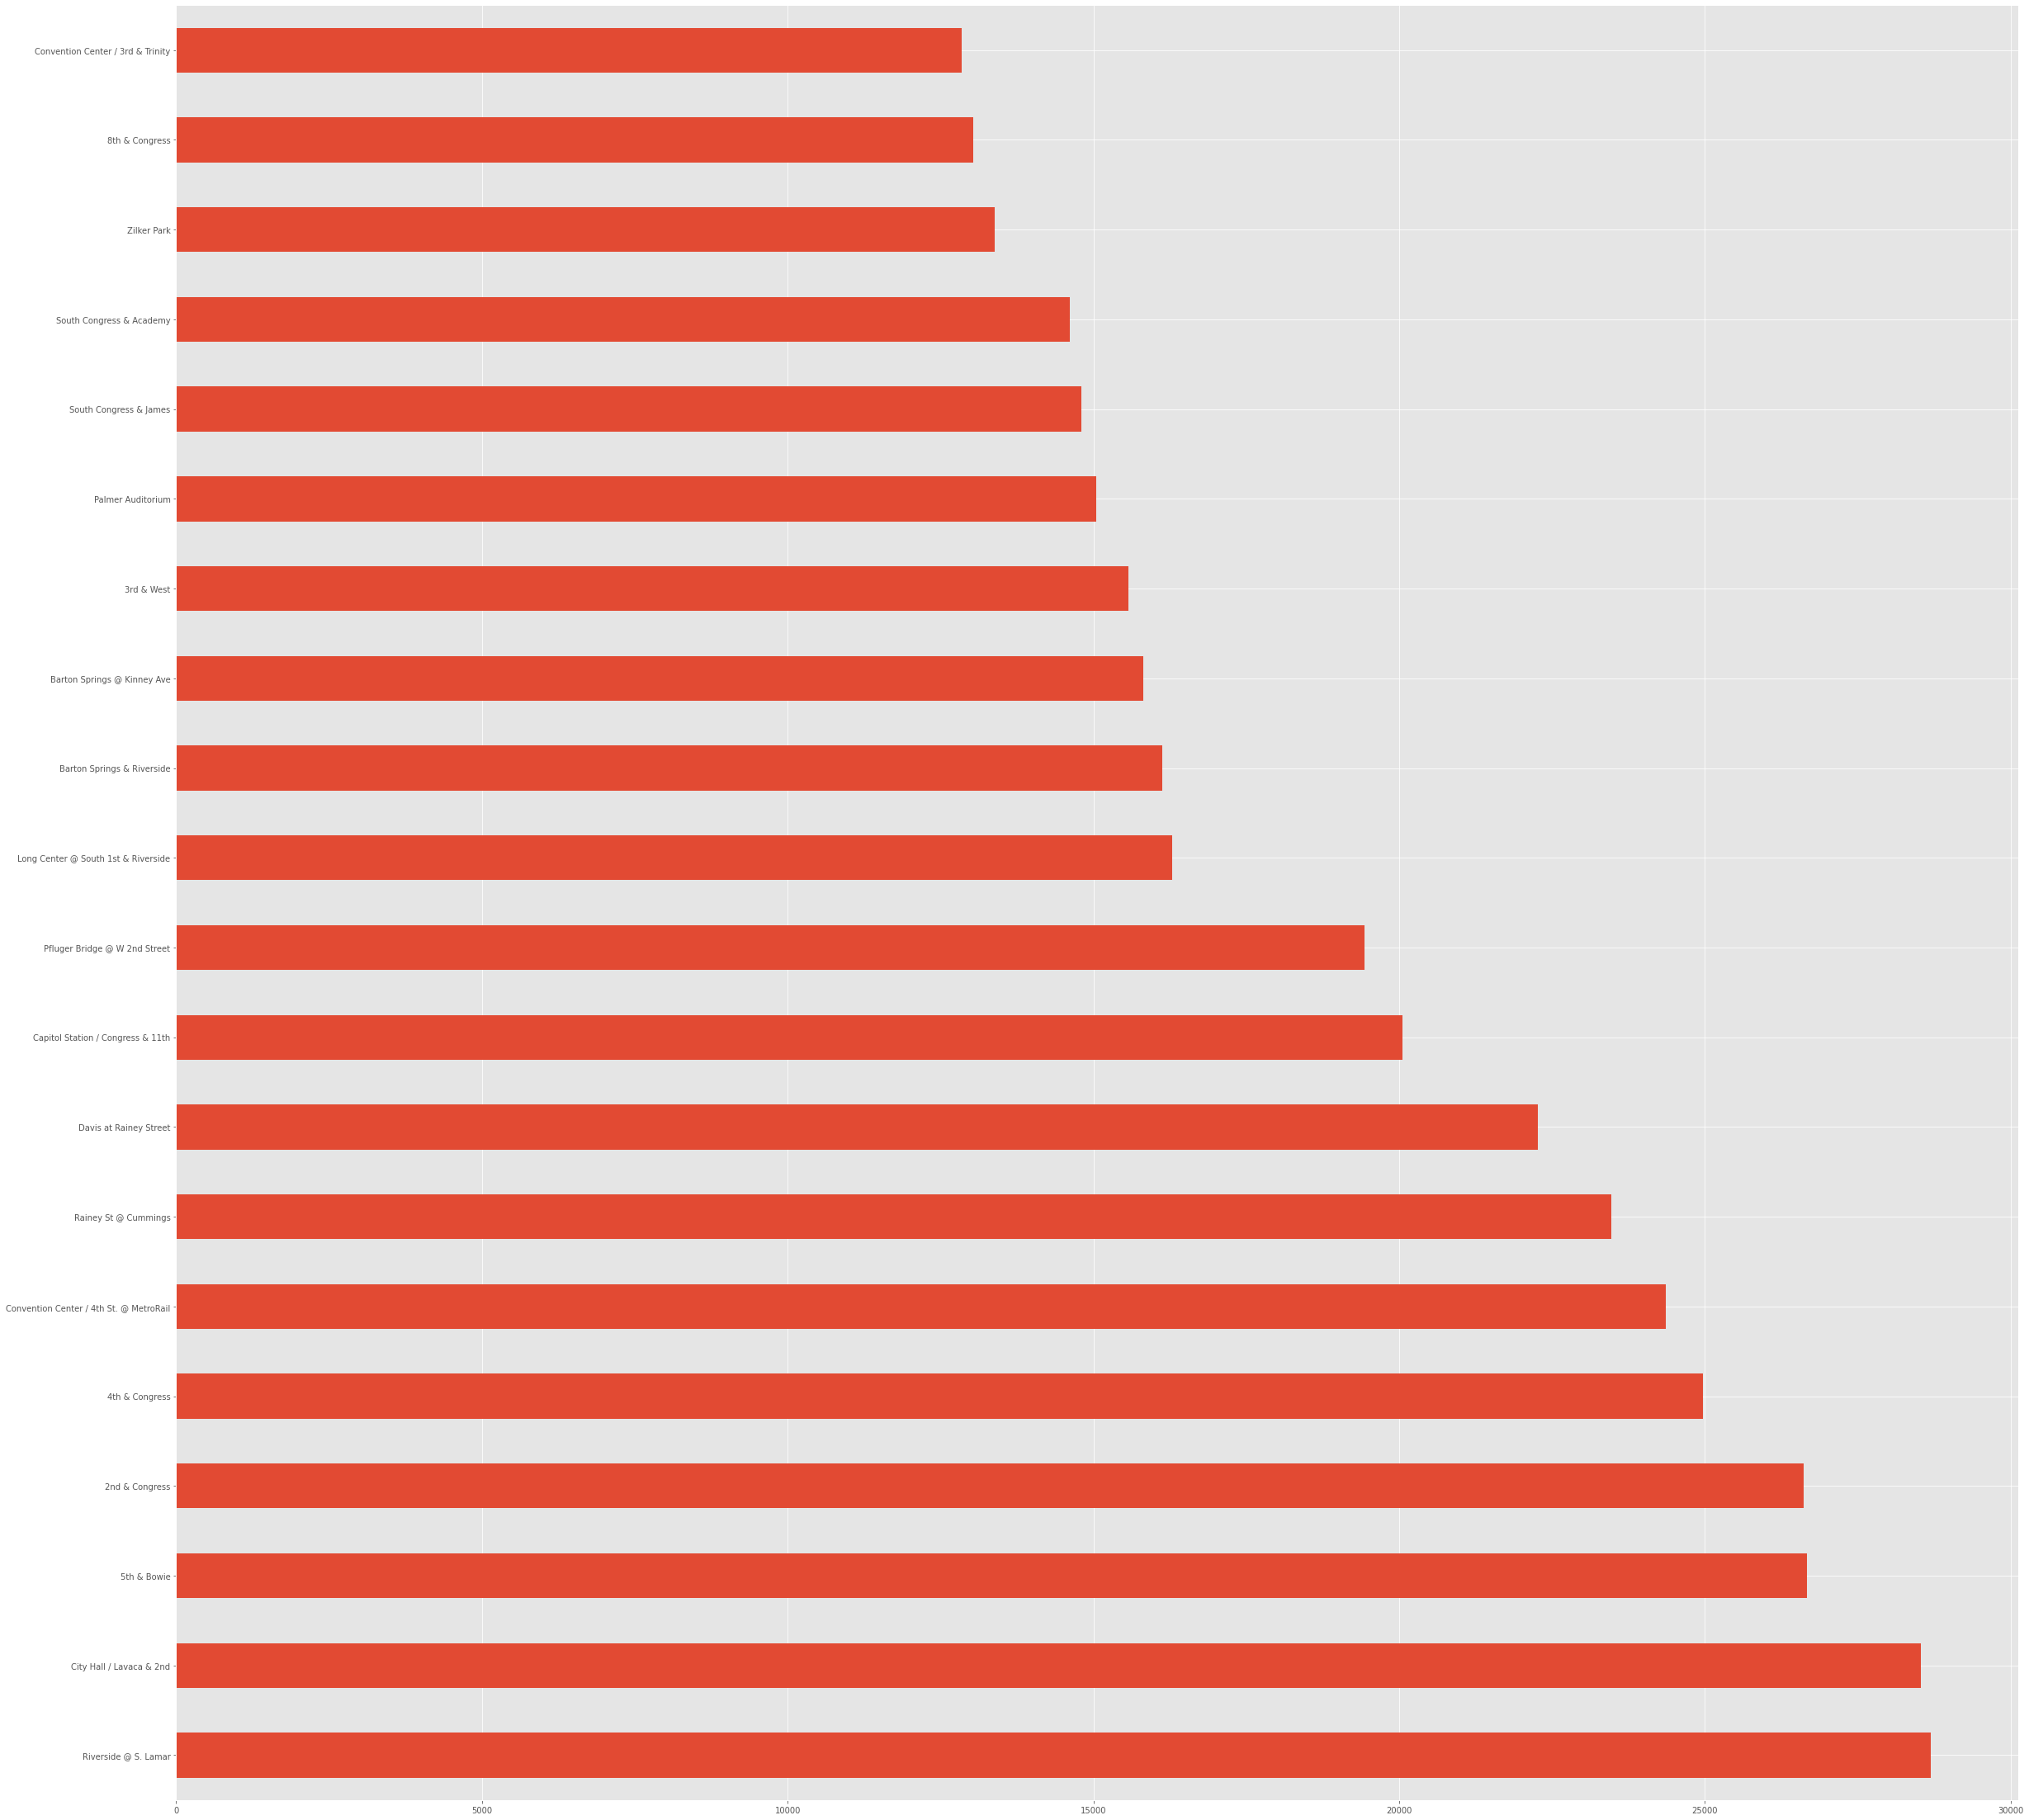

In [32]:
plt.figure(figsize=(40,40))
start_station[:20].plot.barh()
plt.show()

## End Station

In [33]:
end_station=df_t['end_station_name'].value_counts()

In [34]:
end_station

City Hall / Lavaca & 2nd                       33125
2nd & Congress                                 29516
Riverside @ S. Lamar                           28023
4th & Congress                                 27902
Convention Center / 4th St. @ MetroRail        26862
                                               ...  
Mobile Station @ Unplugged                        13
Marketing Event                                   12
Mobile Station @ Boardwalk Opening Ceremony        4
Main Shop                                          2
Re-branding                                        2
Name: end_station_name, Length: 92, dtype: int64

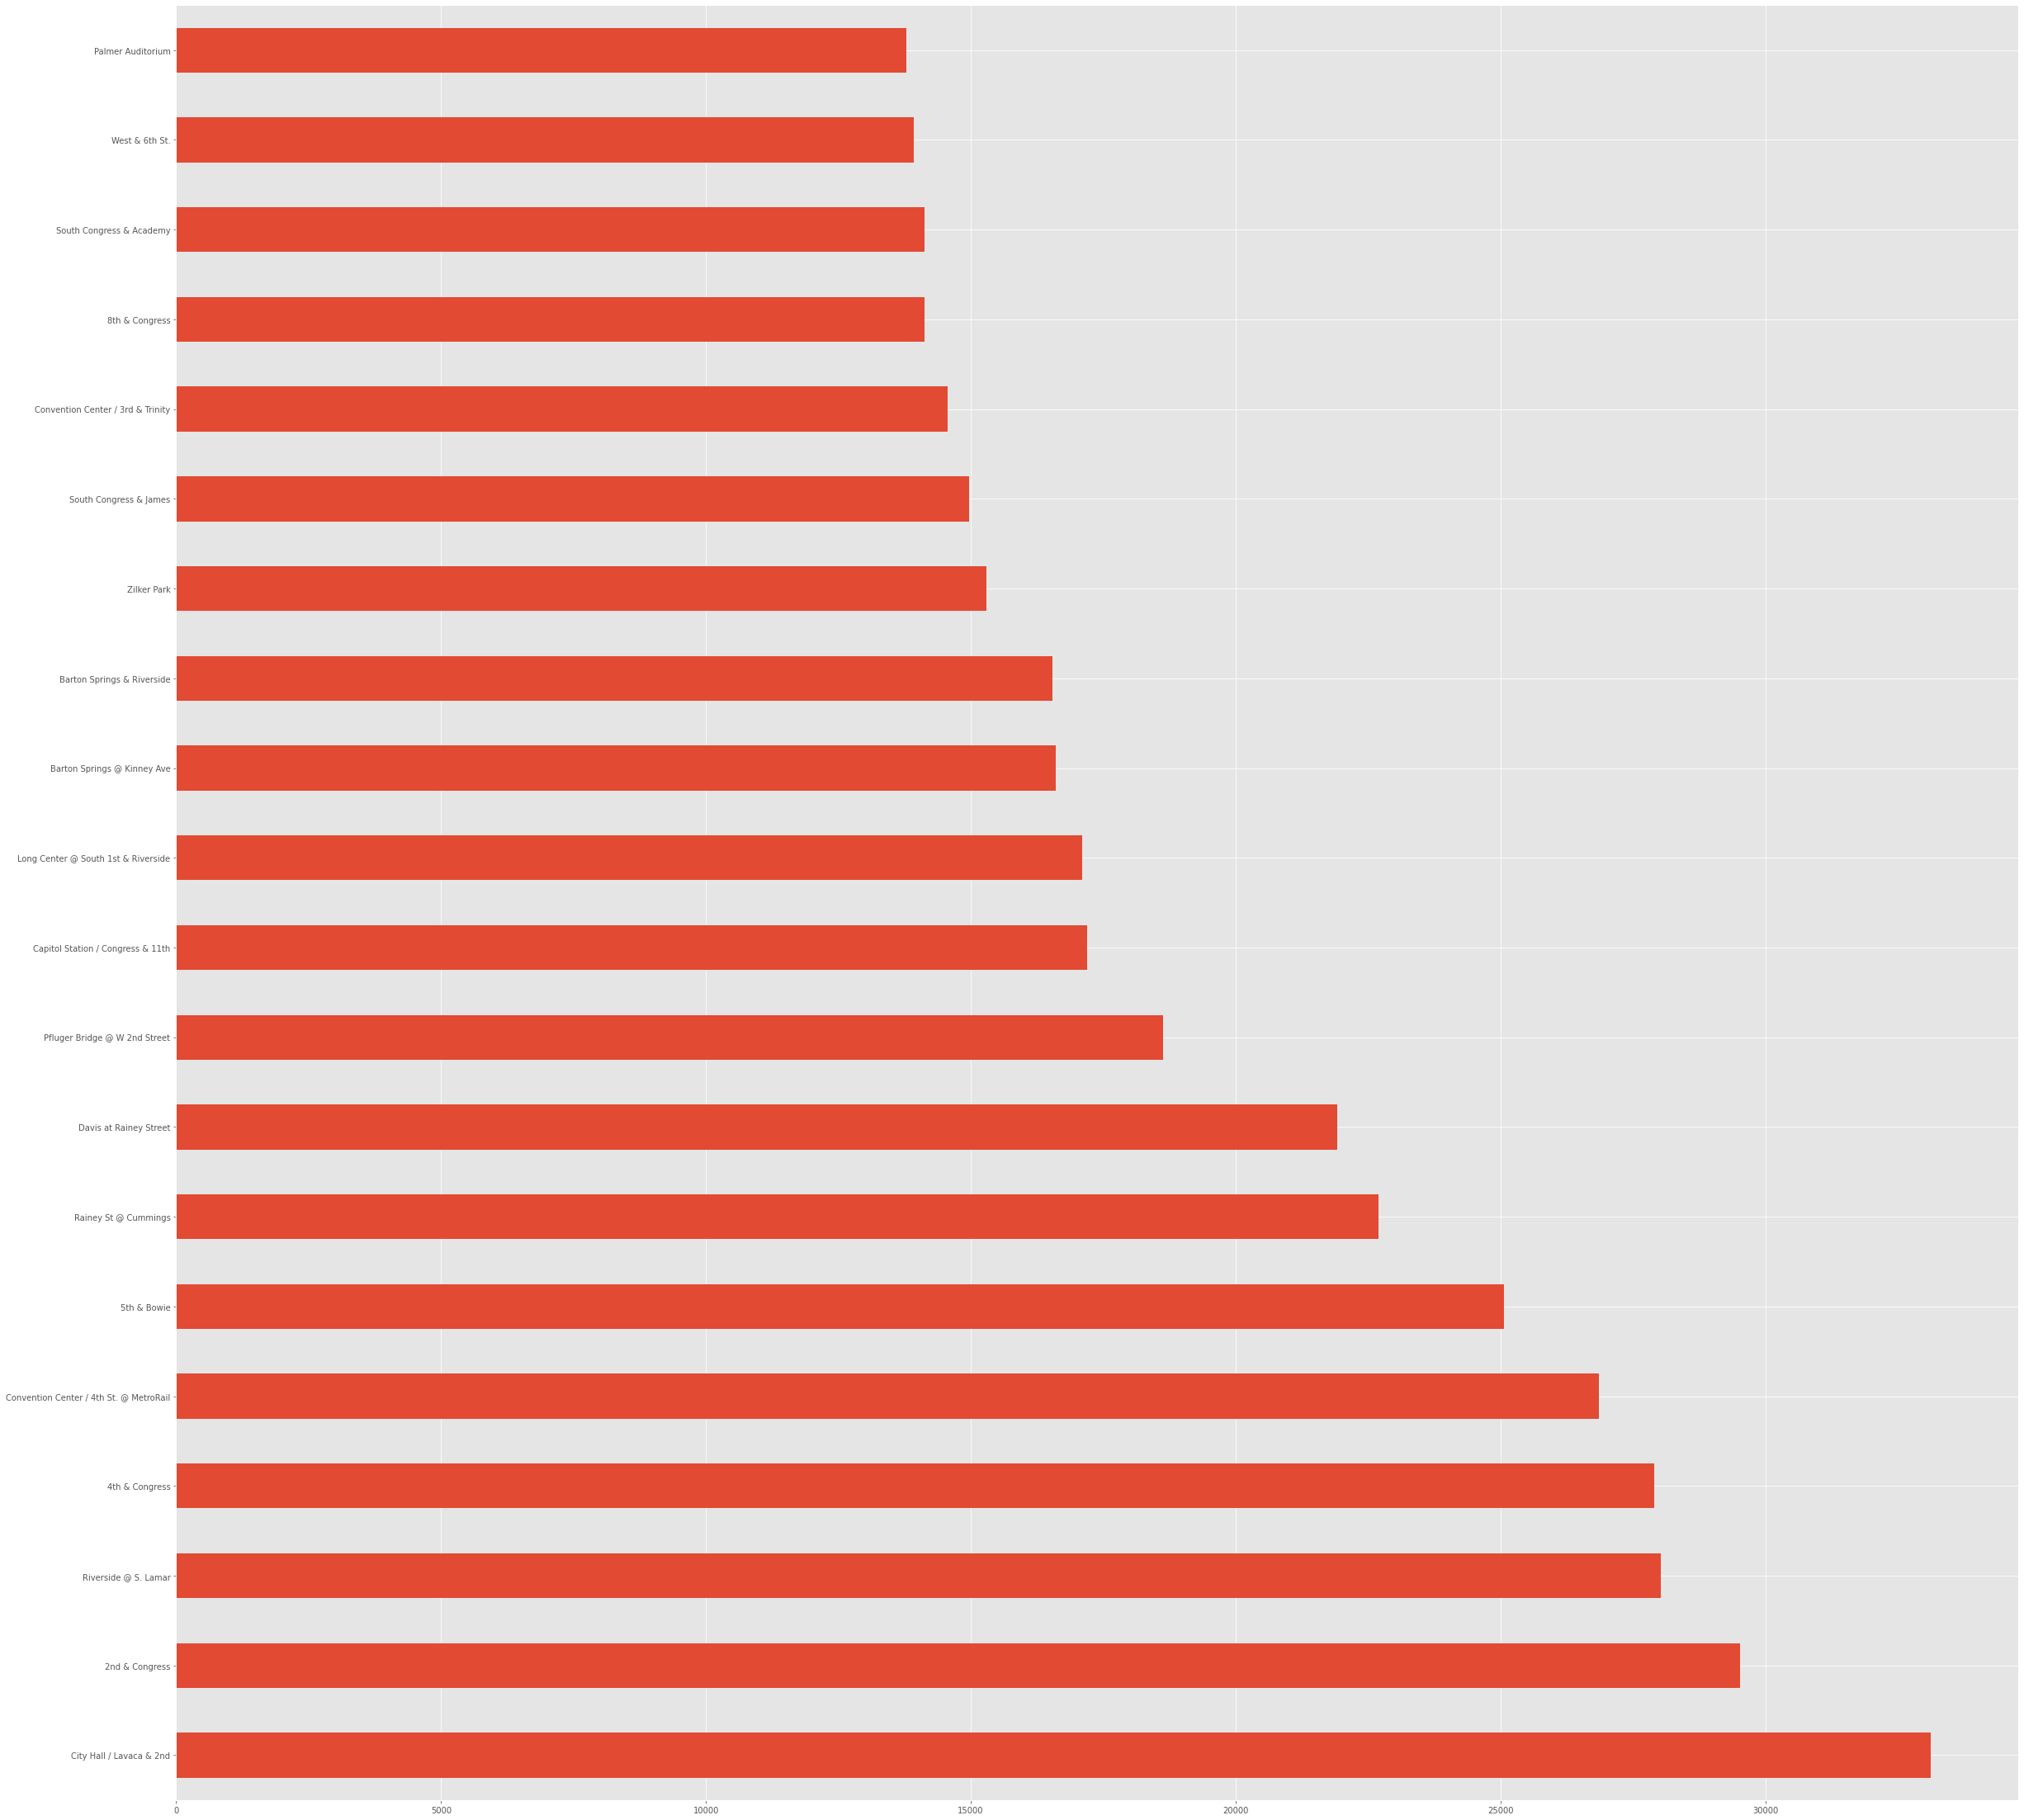

In [35]:
plt.figure(figsize=(40,40))
end_station[:20].plot.barh()
plt.show()

## Busiest Time

In [36]:
df_t.start_time.head()

0    2015-03-19 19:12:00
1    2016-10-30 02:06:04
2    2016-03-11 16:28:27
3    2014-11-23 15:12:00
4    2017-04-16 15:39:13
Name: start_time, dtype: object

In [37]:
import datetime

In [38]:
def toDT(s):
    return datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S")

In [39]:
df_t["start_time"] = df_t.start_time.apply(toDT, input)

In [40]:
df_t.start_time.head()

0   2015-03-19 19:12:00
1   2016-10-30 02:06:04
2   2016-03-11 16:28:27
3   2014-11-23 15:12:00
4   2017-04-16 15:39:13
Name: start_time, dtype: datetime64[ns]

In [41]:
df_t.start_hour = df_t.start_time.apply(lambda x: datetime.datetime(x.year, x.month, x.day, x.hour))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [44]:
df_t.start_hour.head(10)

0   2015-03-19 19:00:00
1   2016-10-30 02:00:00
2   2016-03-11 16:00:00
3   2014-11-23 15:00:00
4   2017-04-16 15:00:00
5   2015-05-29 15:00:00
6   2016-07-26 12:00:00
7   2015-01-15 13:00:00
8   2014-05-05 13:00:00
9   2017-07-08 12:00:00
Name: start_time, dtype: datetime64[ns]

In [45]:
df_t.start_hour.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  649231
unique                  25897
top       2015-03-19 18:00:00
freq                      304
first     2013-12-21 09:00:00
last      2017-07-31 23:00:00
Name: start_time, dtype: object

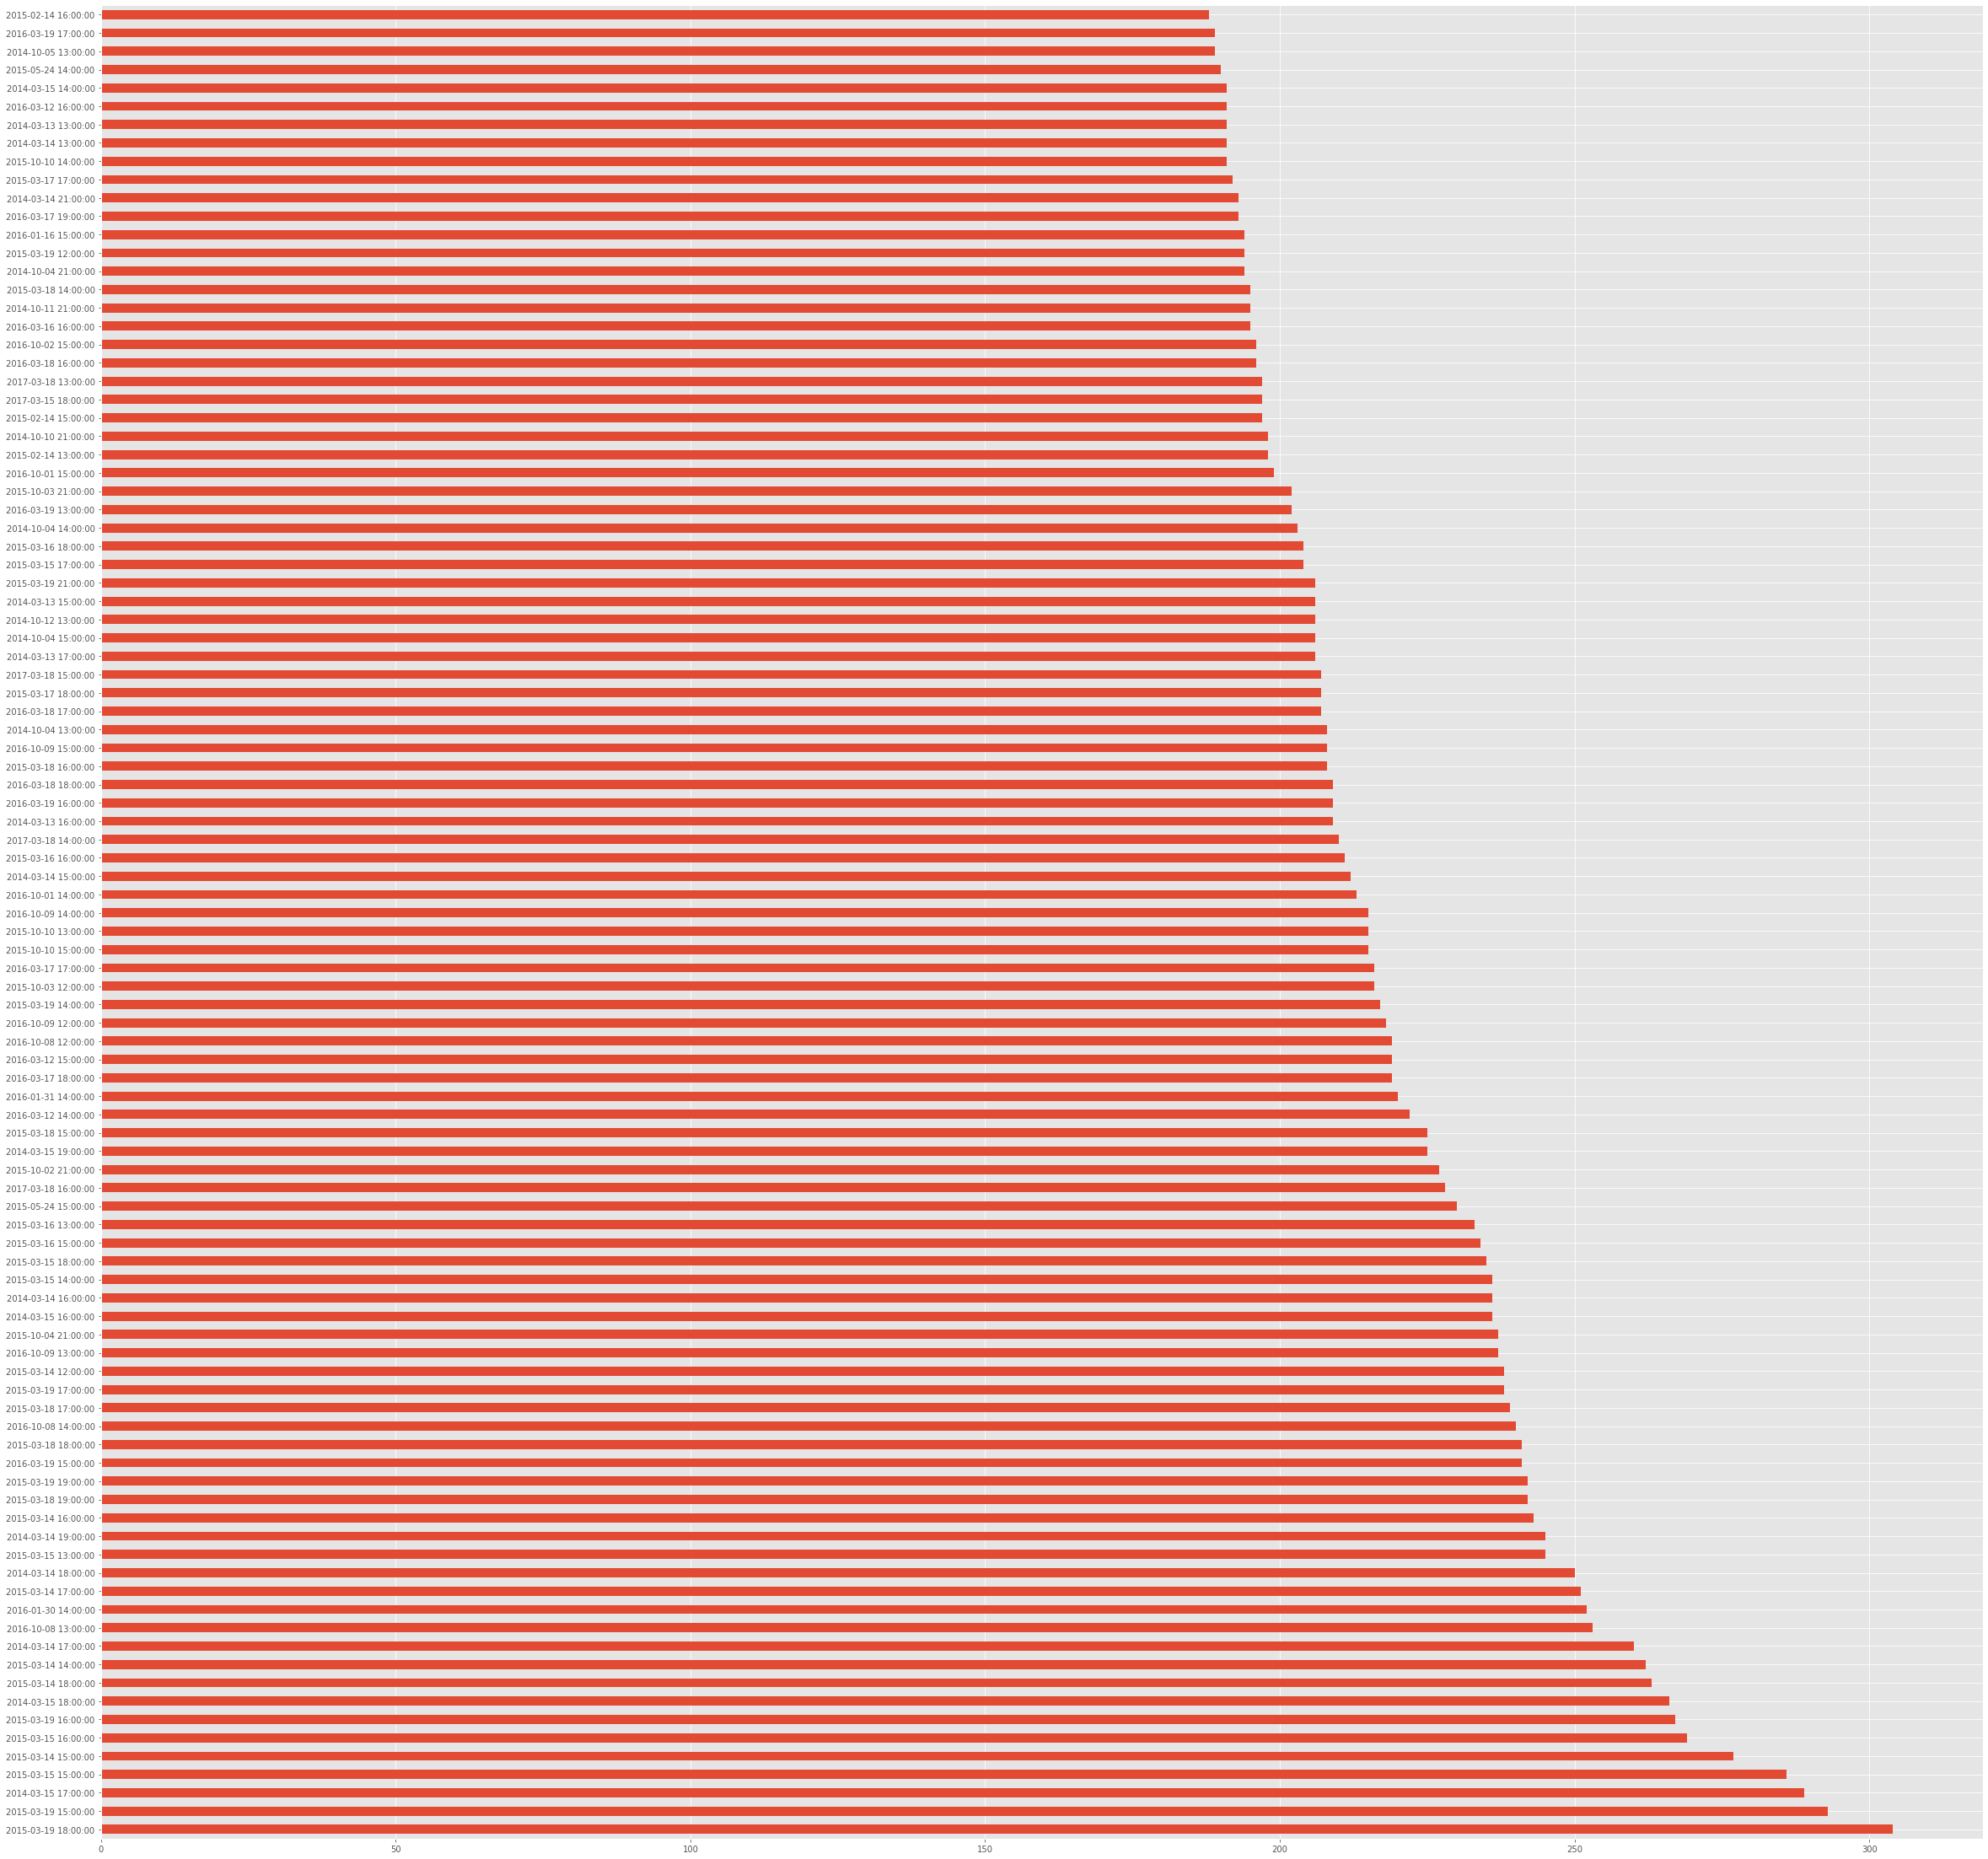

In [46]:
plt.figure(figsize=(40,40))
df_t.start_hour.value_counts()[:100].plot.barh()
plt.show()

In [47]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df_s.head()

latitude              location  ...  station_id  status
0  30.27041  (30.27041 -97.75046)  ...        2537  active
1  30.26452   (30.26452 -97.7712)  ...        2572  active
2  30.27595  (30.27595 -97.74739)  ...        2545  closed
3  30.28480   (30.2848 -97.72756)  ...        1004  closed
4  30.26694  (30.26694 -97.74939)  ...        1008   moved

[5 rows x 6 columns]

In [49]:
m = folium.Map([30.27193, -97.73854], zoom_start=13)
m

In [50]:
for index, row in df_s.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

In [53]:
!pip install http://download.pytorch.org/whl/cpu/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 
!pip install xgboost tpot pandas-profiling seaborn torchvision tqdm

ERROR: torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.
     |████████████████████████████████| 87 kB 4.4 MB/s 
     |████████████████████████████████| 160 kB 46.0 MB/s 
     |████████████████████████████████| 166.7 MB 15 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11955 sha256=a3f54a0f96486a23633eda10e58a761c541ebe005d71c6563bae9cbb0ac6468e
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [55]:
stationArr = df_s[['latitude', 'longitude']].values

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=15))
m

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  after removing the cwd from sys.path.


In [56]:
df_t.describe()

bikeid  duration_minutes  ...       trip_id           year
count  648508.000000     649231.000000  ...  6.492310e+05  618479.000000
mean      471.615214         29.127506  ...  5.384945e+09    2015.340026
std       323.588379         87.278642  ...  4.925349e+09       1.019771
min         3.000000          0.000000  ...  8.269930e+06    2013.000000
25%       208.000000          8.000000  ...  1.274709e+07    2014.000000
50%       417.000000         15.000000  ...  9.900028e+09    2015.000000
75%       745.000000         28.000000  ...  9.900190e+09    2016.000000
max      5089.000000      21296.000000  ...  9.900353e+09    2017.000000

[8 rows x 7 columns]

In [58]:
df_t['duration_minutes'].describe()

count    649231.000000
mean         29.127506
std          87.278642
min           0.000000
25%           8.000000
50%          15.000000
75%          28.000000
max       21296.000000
Name: duration_minutes, dtype: float64